## Import the libraries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(8496, 11)

In [4]:
df.head()

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms,CoVeh_trqAcs_100ms,Clth_st_100ms,CoEng_st_100ms,Com_rTSC1VRVCURtdrTq_100ms,Com_rTSC1VRRDTrqReq_100ms,RoadSlope_100ms,Vehicle_Mass
0,902.5,67.72,1971.9360,-140.0,9.999747,0,3,0,0,1.5,38.0
1,1241.0,63.87,2604.0000,-196.0,9.999747,0,3,0,0,1.7,38.0
2,903.0,67.28,2208.0700,-140.0,9.999747,0,3,0,0,1.3,38.0
3,934.5,68.34,0.0000,-140.0,9.999747,0,3,0,0,-2.7,49.0
4,969.0,61.28,392.5794,-112.0,9.999747,0,3,0,0,2.3,49.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8496 entries, 0 to 8495
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Epm_nEng_100ms              8496 non-null   float64
 1   VehV_v_100ms                8496 non-null   float64
 2   ActMod_trqInr_100ms         8496 non-null   float64
 3   RngMod_trqCrSmin_100ms      8496 non-null   float64
 4   CoVeh_trqAcs_100ms          8496 non-null   float64
 5   Clth_st_100ms               8496 non-null   int64  
 6   CoEng_st_100ms              8496 non-null   int64  
 7   Com_rTSC1VRVCURtdrTq_100ms  8496 non-null   int64  
 8   Com_rTSC1VRRDTrqReq_100ms   8496 non-null   int64  
 9   RoadSlope_100ms             8496 non-null   float64
 10  Vehicle_Mass                8496 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 730.2 KB


In [6]:
df.isnull().sum()

Epm_nEng_100ms                0
VehV_v_100ms                  0
ActMod_trqInr_100ms           0
RngMod_trqCrSmin_100ms        0
CoVeh_trqAcs_100ms            0
Clth_st_100ms                 0
CoEng_st_100ms                0
Com_rTSC1VRVCURtdrTq_100ms    0
Com_rTSC1VRRDTrqReq_100ms     0
RoadSlope_100ms               0
Vehicle_Mass                  0
dtype: int64

### UniStats

In [7]:
def unistats(df):
    import pandas as pd
    output_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Otype', 'Numeric', 'Mode', 'Mean', 'Min', '25%', 'Median', '75%', 'Max', 'Std', 'Skew', 'Kurt'])
    for col in df:
      if pd.api.types.is_numeric_dtype(df[col]):
        output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]),
                              df[col].mode().values[0], df[col].mean(), df[col].min(), df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75),
                              df[col].max(), df[col].std(), df[col].skew(), df[col].kurt()]
      else:
        output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), df[col],
                            df[col].mode().value[0], '-', '-', '-', '-', '-', '-', '-', '-', '-']
    return output_df

In [8]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
unistats(df)

,Count,Missing,Unique,Otype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Epm_nEng_100ms,8496,0,1269,float64,True,1157.500000,1104.671257,481.500000,948.375000,1145.000000,1192.500000,2119.500000,1.572674e+02,0.437110,2.439523
VehV_v_100ms,8496,0,3205,float64,True,71.480000,64.349988,38.310000,57.092500,67.375000,71.580000,88.930000,1.069150e+01,-0.636826,-0.317536
ActMod_trqInr_100ms,8496,0,2303,float64,True,0.000000,1419.595527,0.000000,363.923300,1627.500000,2348.739000,2688.000000,9.894122e+02,-0.269039,-1.436082
RngMod_trqCrSmin_100ms,8496,0,233,float64,True,-168.000000,-158.917143,-308.000000,-168.000000,-168.000000,-140.000000,-84.000000,2.644996e+01,-0.314223,1.280626
CoVeh_trqAcs_100ms,8496,0,1,float64,True,9.999747,9.999747,9.999747,9.999747,9.999747,9.999747,9.999747,3.552923e-15,0.000000,0.000000
Clth_st_100ms,8496,0,1,int64,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
CoEng_st_100ms,8496,0,1,int64,True,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000e+00,0.000000,0.000000
Com_rTSC1VRVCURtdrTq_100ms,8496,0,1,int64,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
Com_rTSC1VRRDTrqReq_100ms,8496,0,1,int64,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
RoadSlope_100ms,8496,0,160,float64,True,1.700000,0.877949,-4.800000,-0.400000,1.000000,2.100000,5.000000,2.201932e+00,-0.255913,-0.299001


Remove CoVeh-trqAcs-100ms, Clth-st-100ms,
CoEng-st-100ms, Com-rTSC1VRVCURtdrTq-100ms, Com-
rTSC1VRRDTrqReq-100ms

In [9]:
columns_to_remove = ['CoVeh_trqAcs_100ms', 'Clth_st_100ms', 'CoEng_st_100ms', 'Com_rTSC1VRVCURtdrTq_100ms', 'Com_rTSC1VRRDTrqReq_100ms']
df = df.drop(columns=columns_to_remove, axis=0)

### Bivstats

In [10]:
def bivstats(df, label):
    import pandas as pd
    import numpy as np
    from scipy import stats
    output_df = pd.DataFrame(columns=['r', 'p', 'F', 'X2'])
    for col in df:
        if col != label:
            if pd.api.types.is_numeric_dtype(df[col]):
                if df[col].isnull().sum() == 0:
                    r, p = stats.pearsonr(df[label], df[col])
                    output_df.loc[col] = [round(r, 3), round(p, 3), np.nan, np.nan]

                else:
                    output_df.loc[col] = [np.nan, np.nan, np.nan, 'nulls']
    output_df = output_df.sort_values(by=['r'], ascending=False)
    return output_df

In [11]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
bivstats(df, 'RoadSlope_100ms')

,r,p,F,X2
ActMod_trqInr_100ms,0.744,0.0,NaN,NaN
RngMod_trqCrSmin_100ms,0.459,0.0,NaN,NaN
Vehicle_Mass,0.258,0.0,NaN,NaN
Epm_nEng_100ms,0.138,0.0,NaN,NaN
VehV_v_100ms,-0.705,0.0,NaN,NaN


In [12]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
bivstats(df, 'Vehicle_Mass')

,r,p,F,X2
RngMod_trqCrSmin_100ms,0.604,0.0,NaN,NaN
RoadSlope_100ms,0.258,0.0,NaN,NaN
Epm_nEng_100ms,0.157,0.0,NaN,NaN
ActMod_trqInr_100ms,0.084,0.0,NaN,NaN
VehV_v_100ms,-0.630,0.0,NaN,NaN


### Scatter Plot

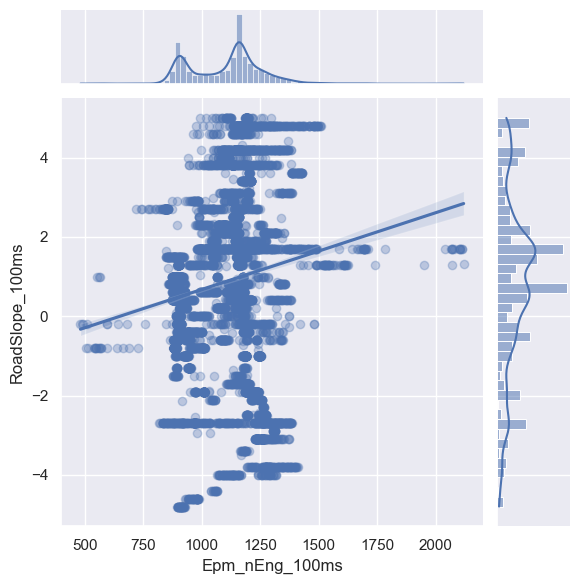

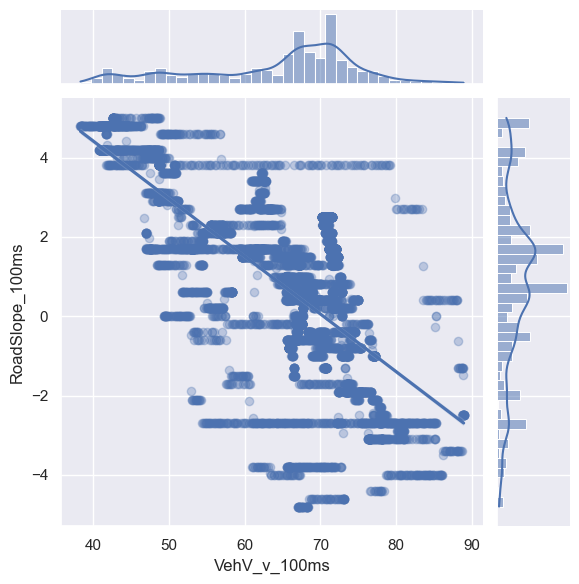

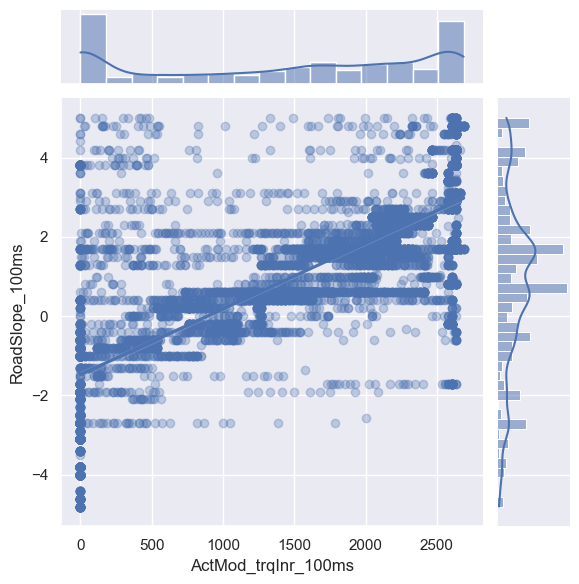

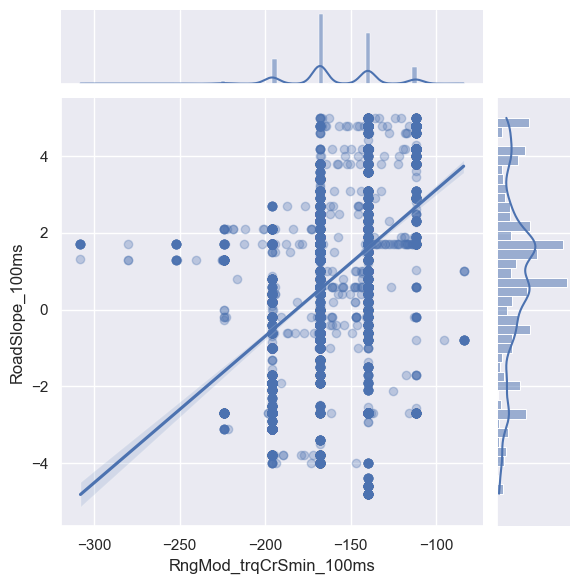

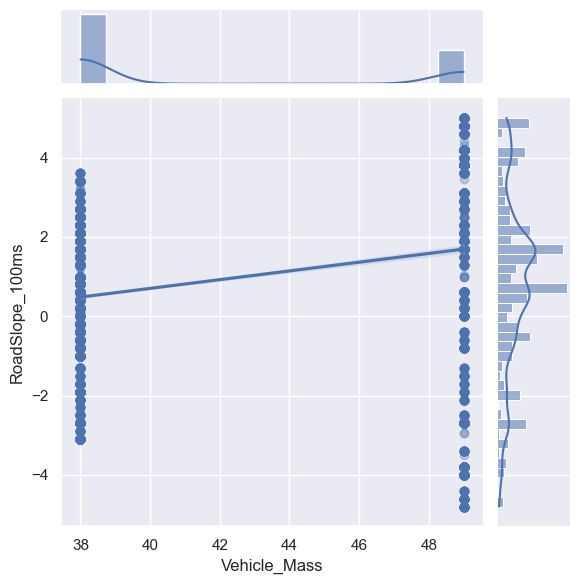

In [13]:
def scatter(df, label_column):
    sns.set(color_codes=True)
    for column in df.columns:
        if column != label_column:
            sns.jointplot(x=column, y=label_column, data=df, kind='reg', scatter_kws={'alpha':0.3})
            # plt.title(f'Scatter plot of {column} with {label_column}')
            plt.show()

scatter(df, 'RoadSlope_100ms')

### Correlation Matrix

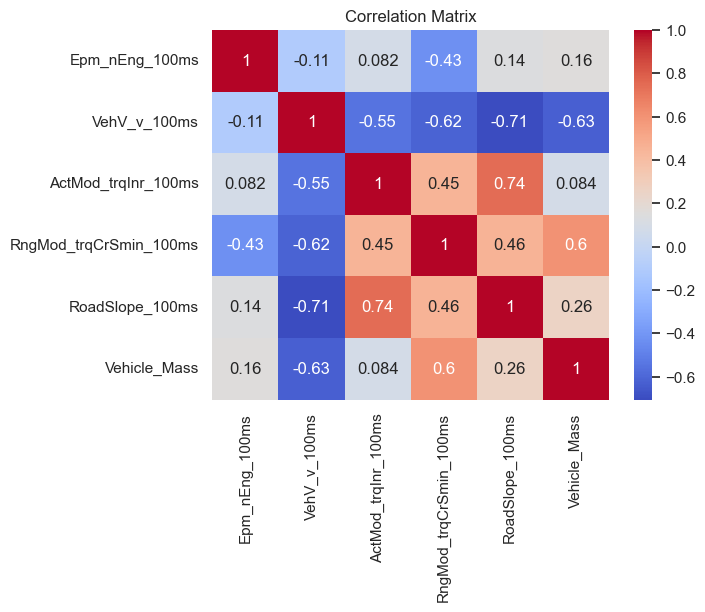

In [14]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=False)
plt.title('Correlation Matrix')
plt.show()

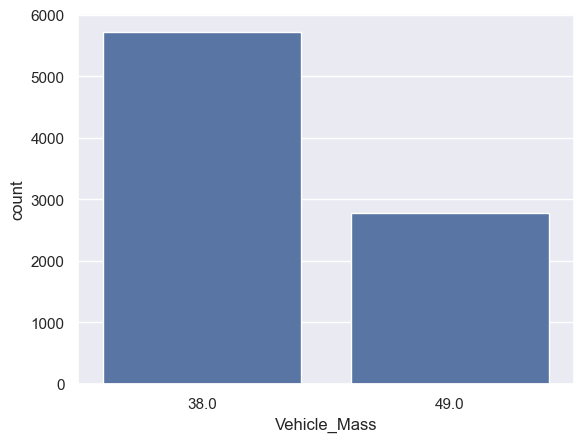

In [15]:
_ = sns.countplot(x=df['Vehicle_Mass'])

## Feature Transformation and Model

In [16]:
df.head()

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms,RoadSlope_100ms,Vehicle_Mass
0,902.5,67.72,1971.9360,-140.0,1.5,38.0
1,1241.0,63.87,2604.0000,-196.0,1.7,38.0
2,903.0,67.28,2208.0700,-140.0,1.3,38.0
3,934.5,68.34,0.0000,-140.0,-2.7,49.0
4,969.0,61.28,392.5794,-112.0,2.3,49.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8496 entries, 0 to 8495
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Epm_nEng_100ms          8496 non-null   float64
 1   VehV_v_100ms            8496 non-null   float64
 2   ActMod_trqInr_100ms     8496 non-null   float64
 3   RngMod_trqCrSmin_100ms  8496 non-null   float64
 4   RoadSlope_100ms         8496 non-null   float64
 5   Vehicle_Mass            8496 non-null   float64
dtypes: float64(6)
memory usage: 398.4 KB


### RoadSlope_100ms

In [18]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
X_train = df.drop(columns=['Vehicle_Mass','RoadSlope_100ms' ])

Y_train_slope = df['RoadSlope_100ms']
Y_train_mass = df['Vehicle_Mass']


In [19]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, Y_train_slope, test_size=0.3, random_state=42)

In [20]:
transformer1 = RobustScaler().fit(X_train1)
X_train1 = transformer1.transform(X_train1)
X_test1 = transformer1.transform(X_test1)

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

In [22]:
models = {
    "KNN Regressor": KNeighborsRegressor(),
    "Linear Regression": LinearRegression(),
    "XGB Regressor": XGBRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "SVR": SVR()
}
results = pd.DataFrame(columns=["Model", "MAE"])

for name, model in models.items():
    model.fit(X_train1, y_train1)
    preds = model.predict(X_test1)
    mae = mean_absolute_error(y_test1, preds)
    results = results.append({"Model": name, "MAE": mae}, ignore_index=True)

print(results)

C:\Users\MSI\AppData\Local\Temp\ipykernel_10380\1610906117.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model": name, "MAE": mae}, ignore_index=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_10380\1610906117.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model": name, "MAE": mae}, ignore_index=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_10380\1610906117.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model": name, "MAE": mae}, ignore_index=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_10380\1610906117.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

                     Model       MAE
0            KNN Regressor  0.224194
1        Linear Regression  0.889066
2            XGB Regressor  0.301203
3  Random Forest Regressor  0.229430
4                      SVR  0.562100


C:\Users\MSI\AppData\Local\Temp\ipykernel_10380\1610906117.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model": name, "MAE": mae}, ignore_index=True)


### Vehicle_Mass

In [23]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, Y_train_mass, test_size=0.3, random_state=42)

In [24]:
transformer2 = RobustScaler().fit(X_train2)
X_train2 = transformer2.transform(X_train2)
X_test2 = transformer2.transform(X_test2)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

In [26]:
models = {
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "SVC": SVC(),
    "LogisticRegression": LogisticRegression(),
}
results = pd.DataFrame(columns=["Model", "W"])

for name, model in models.items():
    model.fit(X_train2, y_train2)
    preds = model.predict(X_test2)
    recall1 = recall_score(y_test2, preds, pos_label=38.0)
    recall2 = recall_score(y_test2, preds, pos_label=49.0)
    W = (recall1*recall2)**0.5
    results = results.append({"Model": name, "W": W}, ignore_index=True)

print(results)

C:\Users\MSI\AppData\Local\Temp\ipykernel_10380\3333152251.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model": name, "W": W}, ignore_index=True)


                    Model         W
0  DecisionTreeClassifier  0.995330
1                     SVC  0.992436
2      LogisticRegression  0.968160


C:\Users\MSI\AppData\Local\Temp\ipykernel_10380\3333152251.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model": name, "W": W}, ignore_index=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_10380\3333152251.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model": name, "W": W}, ignore_index=True)


You can improve your score with GridSearchCV to choose best parameters for each model